***Linear regression***

1) Input data

In [0]:
import numpy as np

- import numpy library for random

In [0]:
m = 20  # the num of sample 
x = np.random.uniform(low=0, high=1, size=m)

- I was set the number of sample as 20 
- x was selected for uniform distribution(0~1)

In [0]:
a = 1 # arbitrary init
b = 3
y_hat = a * x + b

- $\hat{y} = ax + b,$ where $a=1$, $b=3$


In [0]:
sigma = 0.1
n = np.random.normal(0, sigma, m)
y = y_hat + n

- Find n using the normal distribution (mean=0, sigma=0.1) and y according to $\hat{y} = y + n$.

In [0]:
import matplotlib.pyplot as plt

- to draw plot, import matplotlib library

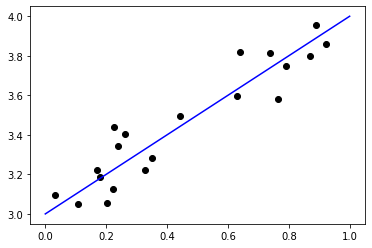

In [55]:
plt.plot([0, 1], [b, a+b], c='b')
plt.scatter(x, y, c='k')

- plotting straight line and set of points  

--------------------------------------------------------------------------------

2) Output result

In [0]:
def hypothesis(theta_0, theta_1, x):
  return theta_0 + theta_1 * x

- for linear regeression, we have to set hypothesis which is $h(x)=\theta_0 + \theta_1 * x $.

In [0]:
def l2_loss (h, y):
  m = len(h)
  ret = np.sum((h-y)*(h-y))
  ret /= m
  return ret

- make loss function that measure difference between hypothesis and labels.

In [0]:
def gradient_descent(x, y, theta_0, theta_1, learning_rate=0.1):
  m = len(x)  # 20 samples
  gradient_theta_0 = np.sum(hypothesis(theta_0, theta_1, x) - y) / m
  gradient_theta_1 = np.sum((hypothesis(theta_0, theta_1, x) - y) * x) / m

  new_theta_0 = theta_0 - learning_rate * gradient_theta_0
  new_theta_1 = theta_1 - learning_rate * gradient_theta_1
  return new_theta_0, new_theta_1

- make gradient descnet function that calculate gradient of loss about $\theta$ 
- along to learning rate, this function update parameters using gradient descent algorithm.

In [0]:
# linear regeression process 

# initialize theta aribitrarily
theta_0 = 0.5
theta_1 = 1.7

theta_0_list = []
theta_1_list = []
loss_list = []

# until converge
converge_step = 400
for i in range(converge_step):
  # loss
  h = hypothesis(theta_0, theta_1, x)

  loss = l2_loss(h, y)
  loss_list.append(loss)

  theta_0_list.append(theta_0)
  theta_1_list.append(theta_1)
  theta_0, theta_1 = gradient_descent(x, y, theta_0, theta_1) # parameter update

- linear regeression process
- until convergence (about 400 steps), keep updating $\theta_0$ and $\theta_1$ using gradient descent function.

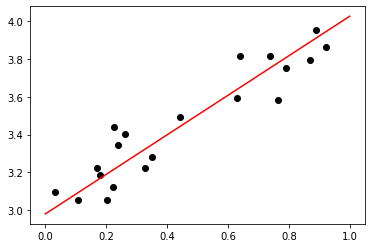

In [64]:
plt.scatter(x, y, c='k')
plt.plot([0, 1], [theta_0, theta_0 + theta_1], c='r')

- plotting datasets
- plotting a straight line that is the graph of a solution obtained by linear regression 

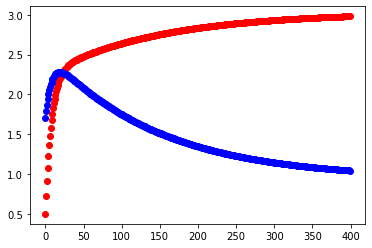

In [62]:
x_ = np.arange(converge_step)
plt.scatter(x_, theta_0_list, c='r')
plt.scatter(x_, theta_1_list, c='b')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


ValueError: ignored

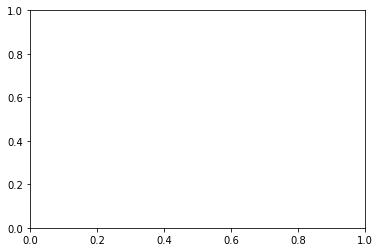

In [63]:
plt.scatter(x_, loss_list, c='bg')